<ipython-input-3-305b02d19bb8>:16: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ts[missing_indices] = np.nan


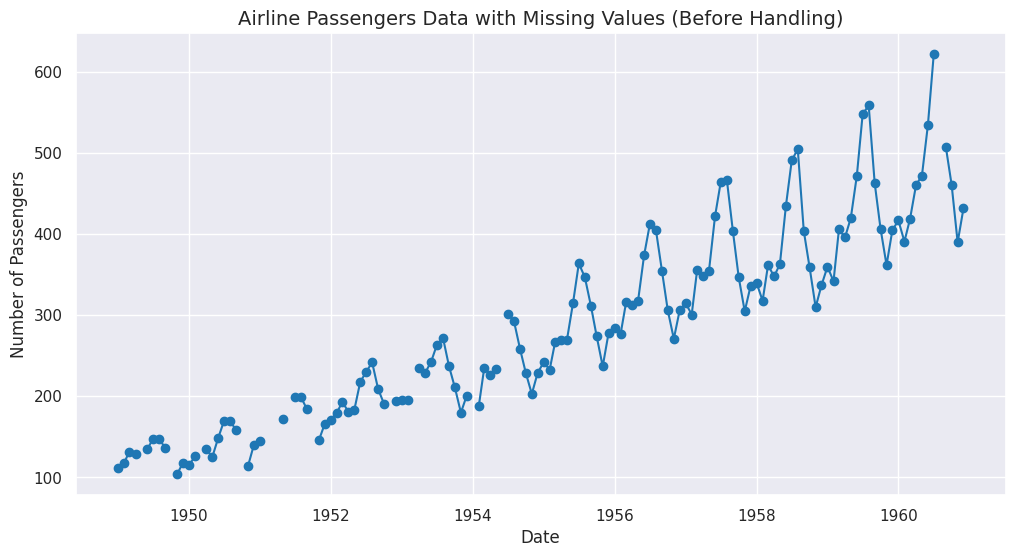

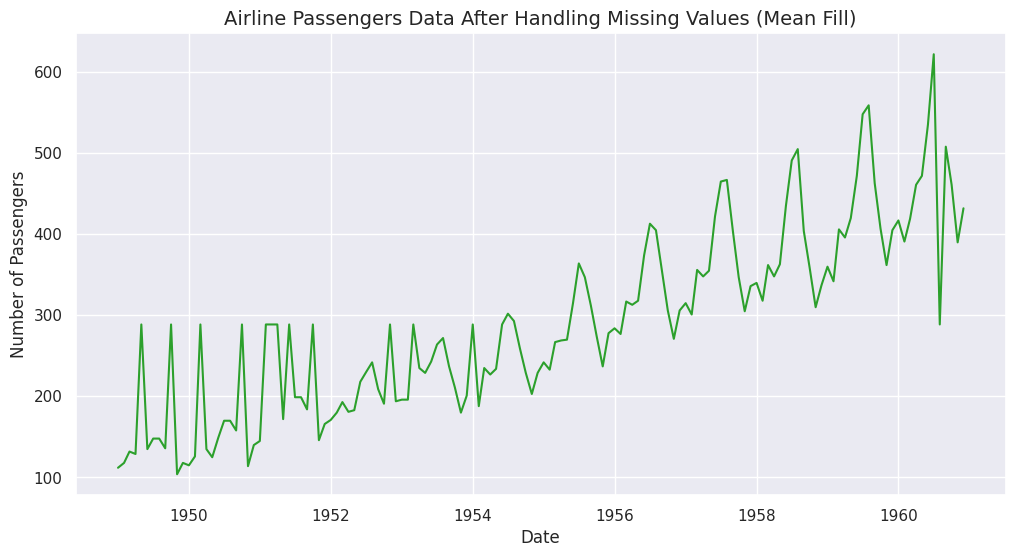

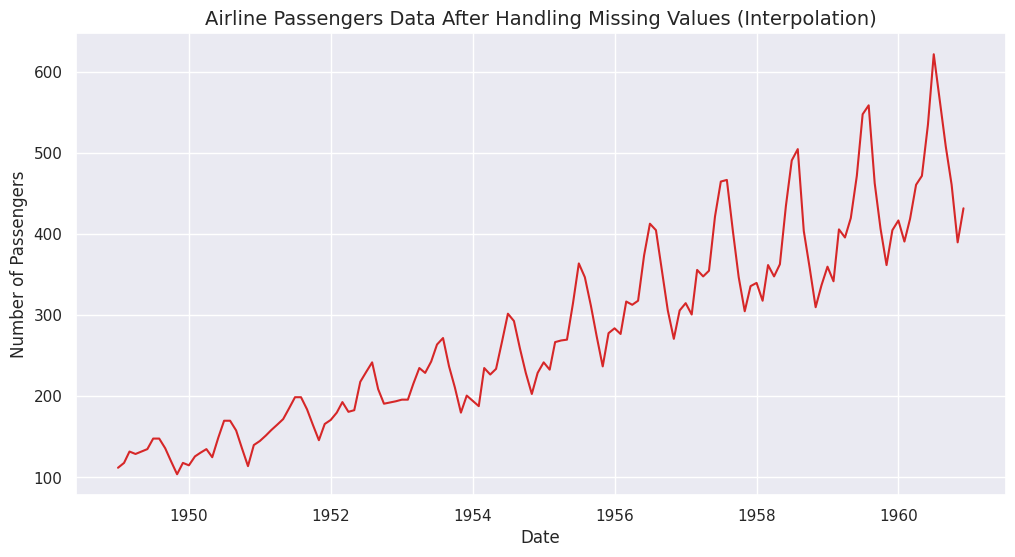

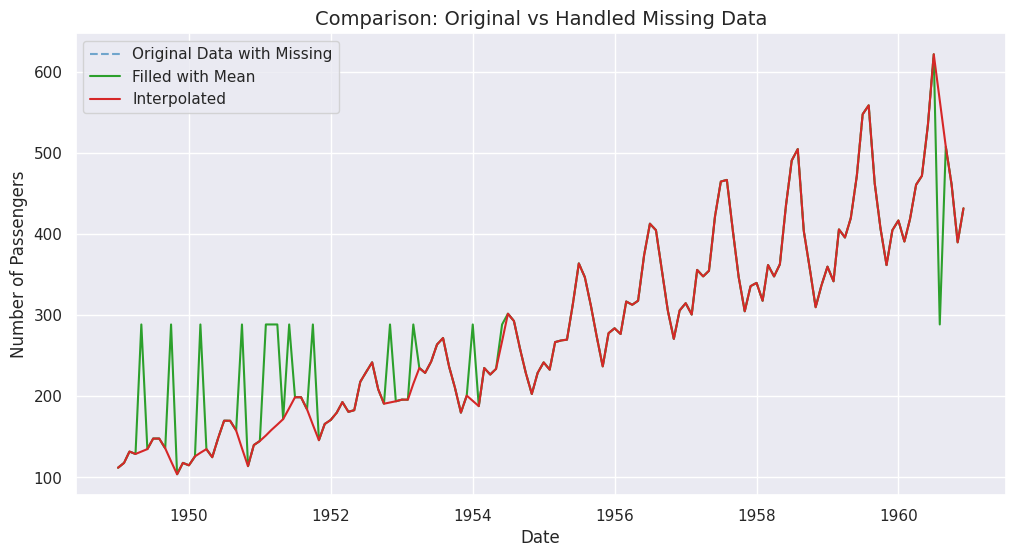

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Air Passengers dataset from a local path (modify with your path if needed)
file_path = '/content/AirPassengers.csv'
df = pd.read_csv(file_path)

# Prepare the time series data
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
ts = df['Passengers']

# Introduce missing values (10% of the data) for demonstration
missing_indices = np.random.choice(len(ts), size=int(len(ts) * 0.1), replace=False)
ts[missing_indices] = np.nan

# Visualization: Data before handling missing values
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='Original Data with Missing', marker='o', linestyle='-', color='tab:blue')
plt.title('Airline Passengers Data with Missing Values (Before Handling)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Handling Missing Data

# Method 1: Fill missing values with the mean
ts_filled_mean = ts.copy()
ts_filled_mean.fillna(ts_filled_mean.mean(), inplace=True)

# Method 2: Interpolate missing values (linear interpolation)
ts_interpolated = ts.copy()
ts_interpolated.interpolate(method='linear', inplace=True)

# Visualization: Data after handling missing values (filling with mean)
plt.figure(figsize=(12, 6))
plt.plot(ts_filled_mean.index, ts_filled_mean, label='Filled with Mean', color='tab:green')
plt.title('Airline Passengers Data After Handling Missing Values (Mean Fill)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Visualization: Data after handling missing values (interpolation)
plt.figure(figsize=(12, 6))
plt.plot(ts_interpolated.index, ts_interpolated, label='Interpolated', color='tab:red')
plt.title('Airline Passengers Data After Handling Missing Values (Interpolation)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Additional: Plotting original vs handled data for comparison
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='Original Data with Missing', color='tab:blue', linestyle='--', alpha=0.6)
plt.plot(ts_filled_mean.index, ts_filled_mean, label='Filled with Mean', color='tab:green')
plt.plot(ts_interpolated.index, ts_interpolated, label='Interpolated', color='tab:red')
plt.title('Comparison: Original vs Handled Missing Data', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

